# Object Oriented Programming with Python

Object-Oriented-Programming (OOP) is a method of structuring programs into objects that encapsulate data and functionality. For examples, Numpy arrays and Pandas data frames are objects that contain data and offer methods to retrive, manipulate and perform operations on the data stored within them. 

Python is an object oriented language, everything in Python is an object. Every object in Python is an instance of class. Classes are blueprints for creating objects. In this note book, I will explore how to create new objects in Python 
The following topics will be covered here 
- Defining classes and creating objects
- Class constructor, properties and methods
- Implementing "dunder" methods for easier usage
- Getters, setters, Static methods and class methods



# Here for the understanding of OPP, I will Implementing Pandas Data Frames from Scratch 

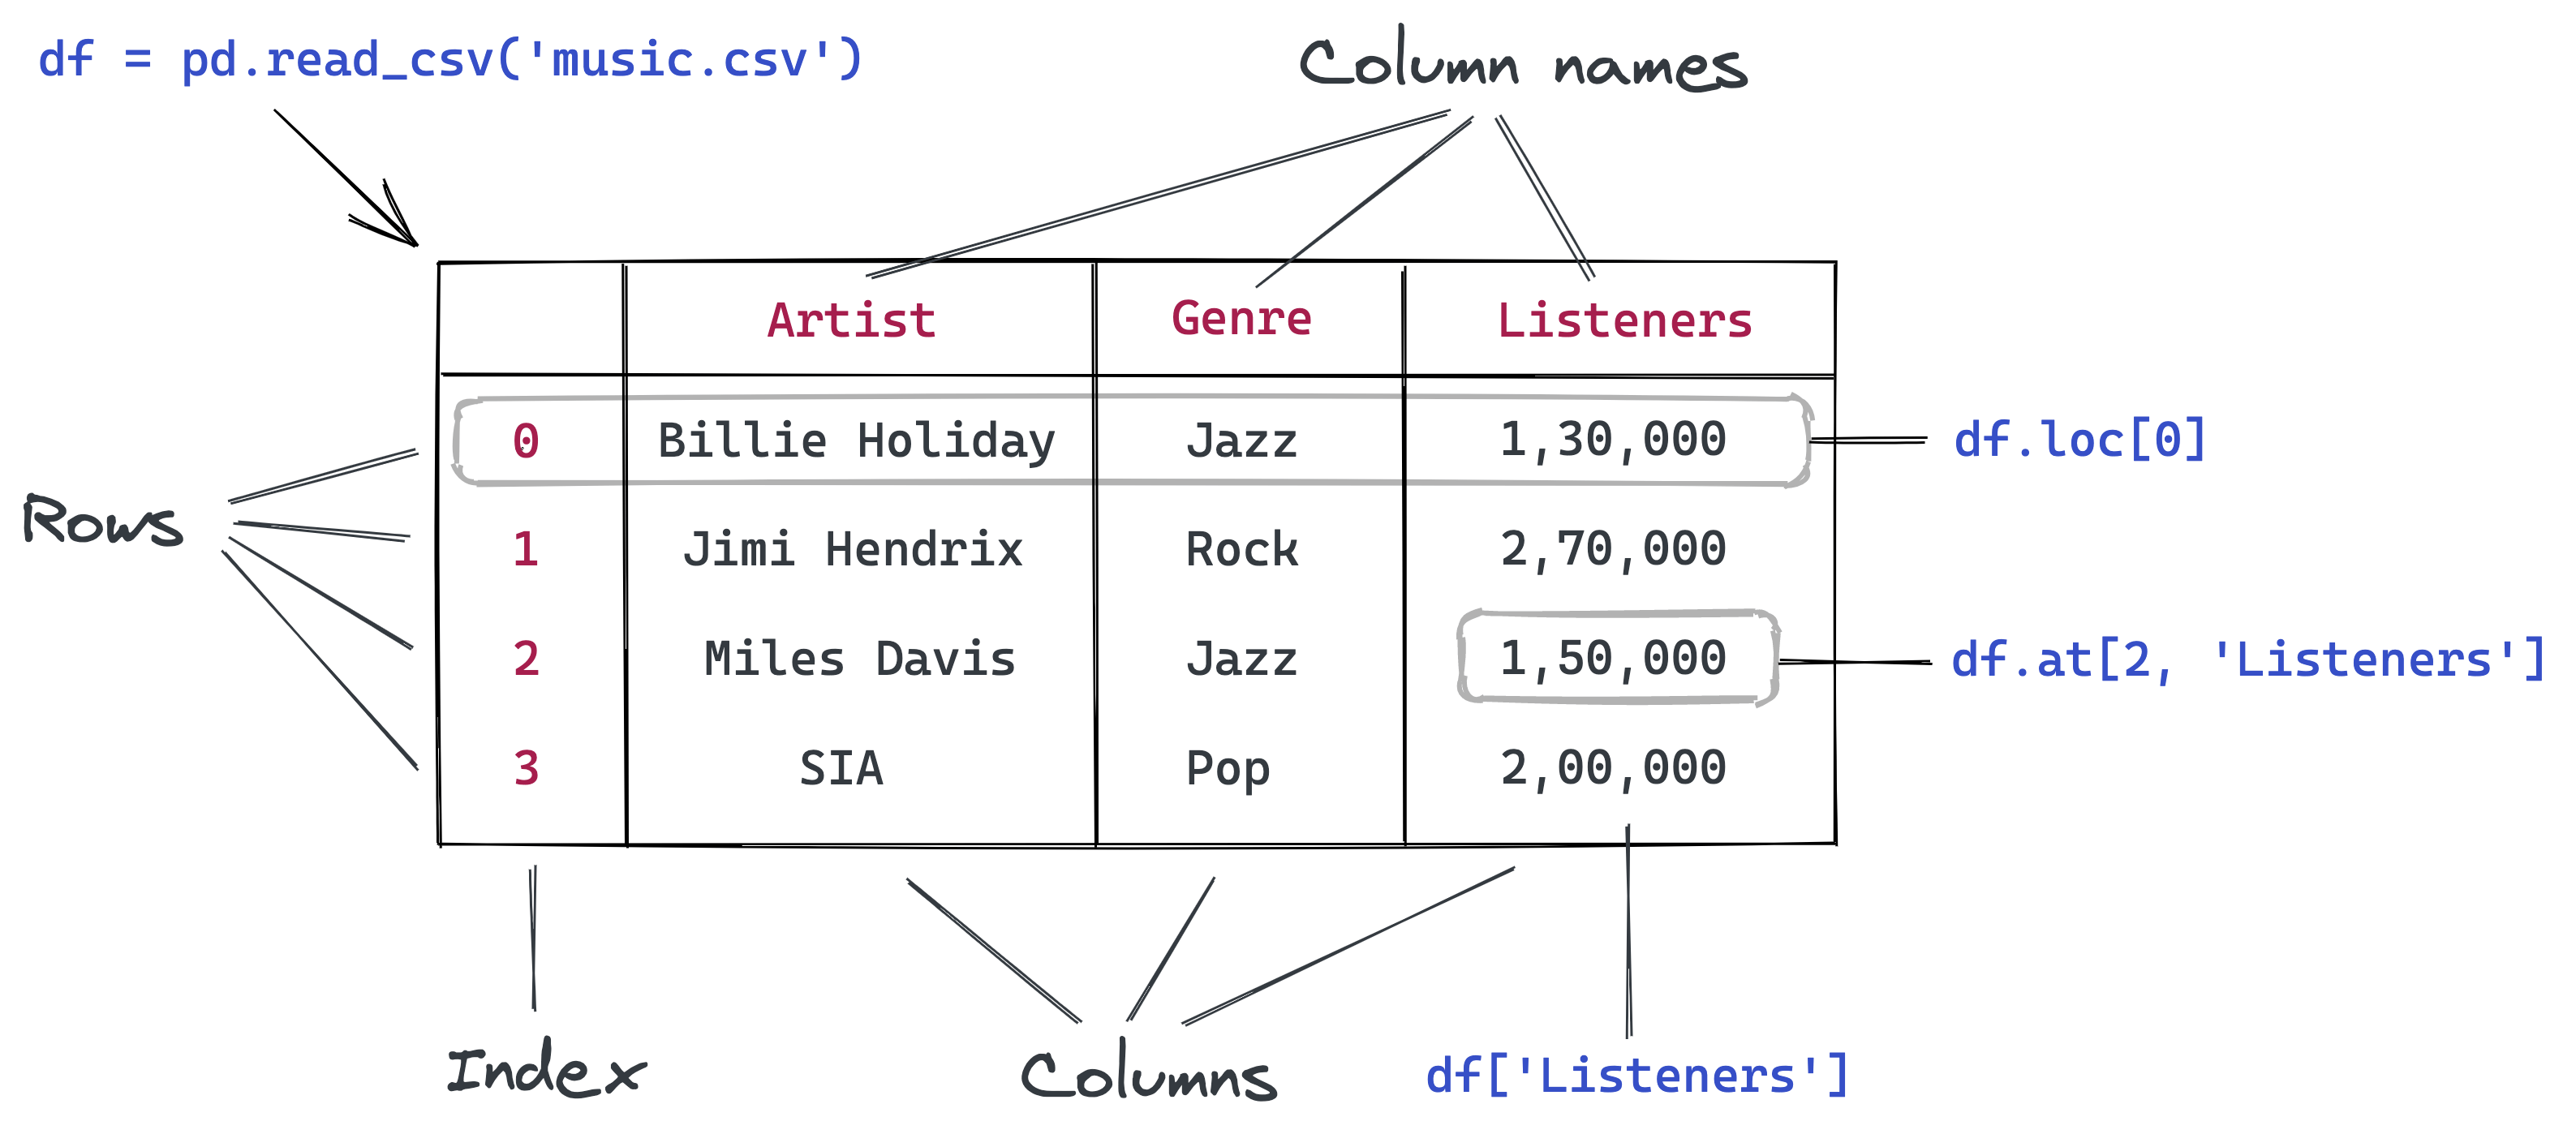

#### Here are some of the functionality I will try to replicate.

In [1]:
import pandas as pd

In [2]:
artists_data = {
    'Artist' : ['Bille Holiday', 'Jimi Hendrix', 'Miles Davis','SIA'],
    'Genre' : ['Jazz', 'Rock', 'Jazz', 'Pop'],
    'Listeners' : [130000, 270000, 150000, 200000]
}

In [3]:
pandas_df = pd.DataFrame(artists_data)

In [4]:
pandas_df

,Artist,Genre,Listeners
0,Bille Holiday,Jazz,130000
1,Jimi Hendrix,Rock,270000
2,Miles Davis,Jazz,150000
3,SIA,Pop,200000


In [5]:
print(pandas_df)

          Artist Genre  Listeners
0  Bille Holiday  Jazz     130000
1   Jimi Hendrix  Rock     270000
2    Miles Davis  Jazz     150000
3            SIA   Pop     200000


In [6]:
pandas_df.shape

(4, 3)

In [7]:
pandas_df.columns

Index(['Artist', 'Genre', 'Listeners'], dtype='object')

In [8]:
pandas_df['Artist']

0    Bille Holiday
1     Jimi Hendrix
2      Miles Davis
3              SIA
Name: Artist, dtype: object

In [9]:
pandas_df2 = pandas_df.copy()

In [10]:
pandas_df2.columns = ['Singer', 'Category', 'Followers']
pandas_df2

,Singer,Category,Followers
0,Bille Holiday,Jazz,130000
1,Jimi Hendrix,Rock,270000
2,Miles Davis,Jazz,150000
3,SIA,Pop,200000


In [11]:
for col in pandas_df:
    print(col)

Artist
Genre
Listeners


In [12]:
pandas_df.to_csv('artists.csv', index= None)

In [13]:
!cat artists.csv

Artist,Genre,Listeners
Bille Holiday,Jazz,130000
Jimi Hendrix,Rock,270000
Miles Davis,Jazz,150000
SIA,Pop,200000


## Defining classes and creating objects

A class is a blueprint for casting an object . Classes are defined using the `class` keyword. The body of a class is an indented block of code that defines its functionality. Here's the simplest way of defining a class.

In [14]:
class DataFrame:
    pass

Here the body of the class contains just one statement `pass`, which does noting i.e the class has no functionality.

We can now create an object of class by invoking the class like an function. 

In [15]:
DataFrame()

Here, We just created an object of the class `DataFrame`. However, we have to way to access the object. We can do so by creating a variable.

In [16]:
df1 = DataFrame()

This variable `df1` holds a reference the object, and can be used to retrieve the object.

In [17]:
df1

When we invoke `DataFrame()` again, it creates a new object.

In [18]:
df2 = DataFrame()
df2

Here we can seen that the objects are differnt because they are at different addresses in the RAM. 

Note that we can have multiple variables pointing towards the same object, simply by reassigning variables. 

In [19]:
df3 = df2 

In [20]:
df3

`df2` and `df3` point to the same object, but `df1` point to a differnt object. More precisely, `df2` and `df3` point to the same location in memory, while `df1` points to a different memory location.

We can check if two variables point to the same objects using the `is` operator, which compares the memory address of the two variables.

In [21]:
df1 is df2 

False

In [22]:
# df1, df2, df3 all are objects
df2 is df3

True

In [23]:
type(df1)

__main__.DataFrame

## Class constructor, properties and methods

Our data farme objects are not doing much. They do not store any data or offer any functionality. Lets give the ability to store some data. 

We will store a fixed dictionary in each object that is created, by defining a constructor method, which is executed automatically when an object is created.

In [24]:
class DataFrame:
    def __init__(self):
        self.data = {'a':[1]}

Note that following in the definition above:
- The double underscores in `--init--`
- The self argument passed to `--init--`, which will be set to the object that is created.
- Setting a property on `self` called `data`. We can name a property anything we want (val, number, the_thing_inside etc)

Let's create an object of this class 

In [25]:
df4 = DataFrame()

We can now access the property `data` of `df4`

In [26]:
df4.data

{'a': [1]}

Internally, What's happening is that Python first create an empty object, stores the reference to the empty object in an temporary varibale calls the `--init--` function with `self` as the argument, Which then sets the property `data` on the created object with the value `{'a': 1}.` Finally, the object is assigned to the varibale `df4`.

In [27]:
self

NameError: name 'self' is not defined

We can not only access, but also can change the value of the property `data`.

In [28]:
df4.data = {'b': [9]}

In [29]:
df4.data

{'b': [9]}

In [30]:
df4.data['c'] = [99]

In [31]:
df4.data

{'b': [9], 'c': [99]}

Note that every new object will contain it's own local copy of the `data` property.

In [32]:
df5 = DataFrame()
df5.data['b'] = [67]

In [33]:
df6 = DataFrame()
df6.data = {'1' : [56], 'J': [78]}

In [34]:
df4.data

{'b': [9], 'c': [99]}

In [35]:
df6.data

{'1': [56], 'J': [78]}

We can also set the initial value of the property while creating the object, by passing arguments to the constructor.

In [36]:
class DataFrame:
    def __init__(self, data):
        self.data = data

The value for the argument `data` can be passed while invoking `DataFrame` to create a new object. 

In [37]:
df7 = DataFrame({'a': [3], 'b': [8], 'c': [12]})

In [38]:
df7.data

{'a': [3], 'b': [8], 'c': [12]}

Now after giving the one more argument, now we can not use the `DataFrame` without the arguments.

In [39]:
df8 = DataFrame()

TypeError: DataFrame.__init__() missing 1 required positional argument: 'data'

Now, Lets define another property `columns`, which is set to the list of columns of the dataframe.

In [40]:
artists_data


{'Artist': ['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA'],
 'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
 'Listeners': [130000, 270000, 150000, 200000]}

In [41]:
list(artists_data.keys())

['Artist', 'Genre', 'Listeners']

In [42]:
class DataFrame:
    def __init__(self, data):
        self.data = data
        self.columns = list(data.keys())

In [43]:
df9 = DataFrame(artists_data)

In [44]:
df9.data

{'Artist': ['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA'],
 'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
 'Listeners': [130000, 270000, 150000, 200000]}

In [45]:
df9.columns

['Artist', 'Genre', 'Listeners']

Next, now define a method `get_column`, which retrives the values in a given column.

In [46]:
class DataFrame:
    def __init__(self, data):
        self.data = data
        self.columns = list(data.keys())
        
    def get_column(self, col_name):
        return self.data[col_name]

In [47]:
df10 = DataFrame(artists_data)

In [48]:
df10.data

{'Artist': ['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA'],
 'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
 'Listeners': [130000, 270000, 150000, 200000]}

In [49]:
df10.columns

['Artist', 'Genre', 'Listeners']

In [50]:
df10.get_column('Listeners')

[130000, 270000, 150000, 200000]

In [51]:
df10.get_column('Genre')

['Jazz', 'Rock', 'Jazz', 'Pop']

Note, that the `df10` is automatically passed as the `self` argument to `get_column.`

Infact, the above cakk is the same as:

In [52]:
DataFrame.get_column(df10, 'Genre')

['Jazz', 'Rock', 'Jazz', 'Pop']

Let's implemet a method `get_row` which can be used to retrive the row at a given position in the data frame, as a dictionary.


In [53]:
artists_data

{'Artist': ['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA'],
 'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
 'Listeners': [130000, 270000, 150000, 200000]}

In [54]:
class DataFrame:
    def __init__ (self,data):
        self.data = data
        self.columns = list(data.keys())
        
    def get_column(self, col_name):
        return self.data[col_name]
    
    def get_row(self,i):
        result = {}
        for col in self.columns:
            result[col] = self.data[col][i]
        return result

In [55]:
df11 = DataFrame(artists_data)

In [56]:
df11.data

{'Artist': ['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA'],
 'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
 'Listeners': [130000, 270000, 150000, 200000]}

In [57]:
df11.get_row(2)

{'Artist': 'Miles Davis', 'Genre': 'Jazz', 'Listeners': 150000}

In [58]:
df11.get_row(3)

{'Artist': 'SIA', 'Genre': 'Pop', 'Listeners': 200000}

Lets also add a `copy` method to easily create copies of the data frames. we will use the `copy` module to create a deep copy of the dictionary. 

In [59]:
from copy import deepcopy
x = {'a': [10,12]}
y = deepcopy(x)
y 

{'a': [10, 12]}

In [60]:
# Let change the y and check whathere the x change or not 
y['a'][1] = 29
y

{'a': [10, 29]}

In [61]:
x

{'a': [10, 12]}

In [62]:
from copy import deepcopy

class DataFrame:
    def __init__(self,data):
        self.data = data
        self.columns = list(data.keys())
        
    def get_row(self, i):
        result = {}
        for col in self.columns:
            result[col] = self.data[col][i]
        return result
    def copy(self):
        data_copy = deepcopy(self.data)
        return DataFrame(data_copy)

In [63]:
df12 = DataFrame(artists_data)

In [65]:
df13 = df12.copy()

In [66]:
df13.data

{'Artist': ['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA'],
 'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
 'Listeners': [130000, 270000, 150000, 200000]}

Verify that the data in `df13` is indeed a copy, and modifying it won't affect the `data` in `df12`.

In [67]:
df13.data['Artist'][0] = 'Bob Bob'
df13.data

{'Artist': ['Bob Bob', 'Jimi Hendrix', 'Miles Davis', 'SIA'],
 'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
 'Listeners': [130000, 270000, 150000, 200000]}

In [68]:
df12.data

{'Artist': ['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA'],
 'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
 'Listeners': [130000, 270000, 150000, 200000]}

Our `DataFrame` class now contain the following functionality:
- A constructor mehod that can be used to pass a dictionary of data
- A `data` property that can be used to access the distionary of data.
- A `columns` property that can be used to get a list of columns
- A `get_column` method for getting the list of values in a column
- A `get_row` method for getting a row of data as a dictionary. 
- A `copy` method for create a copy of the data frame.

## Implementing "dunder" methods for easier usage

Our implementation of `DataFrame` is shaping up well, however it still faces several limitations, which we will discuss and adress one by one here in this section

### String representation using `__str__` and `__repr__`

We can not view the contents of a `DataFrame` object in the same way we view the contents of a Pandas data farme.

In [69]:
pandas_df

,Artist,Genre,Listeners
0,Bille Holiday,Jazz,130000
1,Jimi Hendrix,Rock,270000
2,Miles Davis,Jazz,150000
3,SIA,Pop,200000


In [70]:
df12

In [71]:
print(pandas_df)

          Artist Genre  Listeners
0  Bille Holiday  Jazz     130000
1   Jimi Hendrix  Rock     270000
2    Miles Davis  Jazz     150000
3            SIA   Pop     200000


In [72]:
print(df12)

We can add this by implementing the `__repr__` and `__str__` method in the class. These are special method in Python (also called "double underscore methods" or "dunder methods").

We will use a helper library called `tabulate` to create a table-like output for our dataframe.

In [73]:
from tabulate import tabulate

In [74]:
artists_data

{'Artist': ['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA'],
 'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
 'Listeners': [130000, 270000, 150000, 200000]}

In [75]:
print(tabulate(artists_data))

-------------  ----  ------
Bille Holiday  Jazz  130000
Jimi Hendrix   Rock  270000
Miles Davis    Jazz  150000
SIA            Pop   200000
-------------  ----  ------


In [76]:
print(tabulate(artists_data, artists_data.keys()))

Artist         Genre      Listeners
-------------  -------  -----------
Bille Holiday  Jazz          130000
Jimi Hendrix   Rock          270000
Miles Davis    Jazz          150000
SIA            Pop           200000


In [77]:
print(tabulate(artists_data, artists_data.keys(), 'pretty'))

+---------------+-------+-----------+
|    Artist     | Genre | Listeners |
+---------------+-------+-----------+
| Bille Holiday | Jazz  |  130000   |
| Jimi Hendrix  | Rock  |  270000   |
|  Miles Davis  | Jazz  |  150000   |
|      SIA      |  Pop  |  200000   |
+---------------+-------+-----------+


In [78]:
from copy import deepcopy
from tabulate import tabulate

class DataFrame:
    def __init__(self, data):
        self.data = data
        self.columns = list(data.keys())
        
    def get_column(self, col_name):
        return self.data[col_name]
    
    def get_row(self, i):
        result = {}
        for col in self.columns:
            result[col] = self.data[col][i]
        return result
    
    def copy(self):
        data_copy = copy.deepcopy(self.data)
        return DataFrame(data_copy)
    
    def __repr__(self):
        return tabulate(self.data, self.columns, 'pretty')
    
    def __str__(self):
        return tabulate(self.data, self.columns, 'pretty')

What's the difference between `__str__`and `__repr__`? Look it up!

In [79]:
df14 = DataFrame(artists_data)

In [80]:
df14

+---------------+-------+-----------+
|    Artist     | Genre | Listeners |
+---------------+-------+-----------+
| Bille Holiday | Jazz  |  130000   |
| Jimi Hendrix  | Rock  |  270000   |
|  Miles Davis  | Jazz  |  150000   |
|      SIA      |  Pop  |  200000   |
+---------------+-------+-----------+

In [81]:
print(df14)

+---------------+-------+-----------+
|    Artist     | Genre | Listeners |
+---------------+-------+-----------+
| Bille Holiday | Jazz  |  130000   |
| Jimi Hendrix  | Rock  |  270000   |
|  Miles Davis  | Jazz  |  150000   |
|      SIA      |  Pop  |  200000   |
+---------------+-------+-----------+


Great, we now have a readable string representation of our data.

### Length using  `__len__`

We can find the number of rows in a Pandas dataframe using the len function.

In [82]:
pandas_df

,Artist,Genre,Listeners
0,Bille Holiday,Jazz,130000
1,Jimi Hendrix,Rock,270000
2,Miles Davis,Jazz,150000
3,SIA,Pop,200000


In [83]:
len(pandas_df)

4

However, our implementation of DataFrame does not support this.

In [84]:
len(df14)

TypeError: object of type 'DataFrame' has no len()

To support usage with the `len` function, we can define the `__len__` method.



In [85]:
from copy import deepcopy
from tabulate import tabulate

class DataFrame:
    def __init__(self, data):
        self.data = data
        self.columns = list(data.keys())
        
    def get_column(self, col_name):
        return self.data[col_name]
    def get_row(self, i):
        result = {}
        for col in self.columns:
            result[col] = self.data[col][i]
        return result
    
    def copy(self):
        data_copy = copy.deepcopy(self.data)
        return DataFrame(data_copy)
    
    def __repr__(self):
        return tabulate(self.data, self.columns, 'pretty')
    
    def __str__(self):
        return tabulate(self.data, self.columns, 'pretty')
    
    def __len__(self):
        return len(self.data[self.columns[0]])
    
    
    

In [86]:
df15= DataFrame(artists_data)

In [87]:
len(df15)

4

In [88]:
df15

+---------------+-------+-----------+
|    Artist     | Genre | Listeners |
+---------------+-------+-----------+
| Bille Holiday | Jazz  |  130000   |
| Jimi Hendrix  | Rock  |  270000   |
|  Miles Davis  | Jazz  |  150000   |
|      SIA      |  Pop  |  200000   |
+---------------+-------+-----------+

Note that not every class you define would need to support the len method.

`__getitem__` and  `__setitem__`

While we do have a method `get_column` to retrieve values in a column from our custom data frames, Pandas dataframes allow doing this easily using the indexing notation.

In [89]:
df16 = DataFrame(artists_data)

In [90]:
df16.get_column('Artist')

['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA']

In [91]:
pandas_df['Artist']

0    Bille Holiday
1     Jimi Hendrix
2      Miles Davis
3              SIA
Name: Artist, dtype: object

In [92]:
df16['Artist']

TypeError: 'DataFrame' object is not subscriptable

Further, Pandas dataframe also allow creating new columns using the indexing notation. 

In [93]:
pandas_df2 = pandas_df.copy()
pandas_df2

,Artist,Genre,Listeners
0,Bille Holiday,Jazz,130000
1,Jimi Hendrix,Rock,270000
2,Miles Davis,Jazz,150000
3,SIA,Pop,200000


In [94]:
sales = [2000, 24000, 27500, 32000]

In [95]:
pandas_df2['Sales'] = sales

In [96]:
pandas_df2

,Artist,Genre,Listeners,Sales
0,Bille Holiday,Jazz,130000,2000
1,Jimi Hendrix,Rock,270000,24000
2,Miles Davis,Jazz,150000,27500
3,SIA,Pop,200000,32000


In [97]:
df16['Sales'] = sales

TypeError: 'DataFrame' object does not support item assignment

To support the indexing notation for getting and creating columns, we can implement the `__getitem__` and `__setitem__ `methods on our class.

In [98]:
from copy import deepcopy
from tabulate import tabulate

class DataFrame:
    def __init__(self, data):
        self.data = deepcopy(data)
        self.columns = list(data.keys())
        
    def __getitem__(self, col_name):
        return self.data[col_name]
    
    def __setitem__(self, col_name, col_values):
        self.data[col_name] = col_values
        self.columns = list(self.data.keys())
    
    def get_row(self, i):
        result = {}
        for col in self.columns:
            result[col] = self.data[col][i]
        return result
    
    def copy(self):
        data_copy = copy.deepcopy(self.data)
        return DataFrame(data_copy)
    
    def __repr__(self):
        return tabulate(self.data, self.columns, 'pretty')
    
    def __str__(self):
        return tabulate(self.data, self.columns, 'pretty')
    
    def __len__(self):
        return len(self.data[self.columns[0]])

In [99]:
df17 = DataFrame(artists_data)

In [100]:
df17

+---------------+-------+-----------+
|    Artist     | Genre | Listeners |
+---------------+-------+-----------+
| Bille Holiday | Jazz  |  130000   |
| Jimi Hendrix  | Rock  |  270000   |
|  Miles Davis  | Jazz  |  150000   |
|      SIA      |  Pop  |  200000   |
+---------------+-------+-----------+

In [101]:
df17 ['Artist']

['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA']

In [102]:
df17['Sales'] = sales
df17

+---------------+-------+-----------+-------+
|    Artist     | Genre | Listeners | Sales |
+---------------+-------+-----------+-------+
| Bille Holiday | Jazz  |  130000   | 2000  |
| Jimi Hendrix  | Rock  |  270000   | 24000 |
|  Miles Davis  | Jazz  |  150000   | 27500 |
|      SIA      |  Pop  |  200000   | 32000 |
+---------------+-------+-----------+-------+

We now have a way to access, add and modify columns in our dataframe.

### `__iter__`

Pandas dataframe also support iteration, and can be used in for loops. Each iteration of the the loop, we get access to one column of the dataframe.

In [103]:
for x in pandas_df:
    print(x)

Artist
Genre
Listeners


In [104]:
for x in df17:
    print(x)

KeyError: 0

To support iteration for custom classes, we can implement the `__iter__` method.

In [105]:
from copy import deepcopy
from tabulate import tabulate

class DataFrame:
    def __init__(self, data):
        self.data = deepcopy(data)
        self.columns = list(data.keys())
        
    def __getitem__(self, col_name):
        return self.data[col_name]
    
    def __setitem__(self, col_name, col_values):
        self.data[col_name] = col_values
        self.columns = list(self.data.keys())
    
    def get_row(self, i):
        result = {}
        for col in self.columns:
            result[col] = self.data[col][i]
        return result
    
    def copy(self):
        data_copy = copy.deepcopy(self.data)
        return DataFrame(data_copy)
    
    def __repr__(self):
        return tabulate(self.data, self.columns, 'pretty')
    
    def __str__(self):
        return tabulate(self.data, self.columns, 'pretty')
    
    def __len__(self):
        return len(self.data[self.columns[0]])
    
    def __iter__(self):
        for col in self.columns:
            yield col

Note the use of the `yield` keyword, instead of `return`. This converts the function into a "generator" which returns a new value each time it is invoked.

In [106]:
df18 = DataFrame(artists_data)

In [107]:
for x in df18:
    print(x)

Artist
Genre
Listeners


We can now iterate over our dataframe using a for loop.

we can find a full list of "dunder" methods and their usage here: https://holycoders.com/python-dunder-special-methods/ . Keep in mind that only some dunder methods are relevant for any given class, and you needn't implement all (or any) of them for every class your create.

## Getters, setters, static methods and class methods


One of the issues with our implementation is that we can't reliably rename the columns of a dataframe, like we can in Pandas.



In [108]:
pandas_df2 = pandas_df.copy()
pandas_df2

,Artist,Genre,Listeners
0,Bille Holiday,Jazz,130000
1,Jimi Hendrix,Rock,270000
2,Miles Davis,Jazz,150000
3,SIA,Pop,200000


In [109]:
pandas_df2.columns = ['Singer', 'Category', 'Listeners']
pandas_df2

,Singer,Category,Listeners
0,Bille Holiday,Jazz,130000
1,Jimi Hendrix,Rock,270000
2,Miles Davis,Jazz,150000
3,SIA,Pop,200000


In [110]:
pandas_df2.columns

Index(['Singer', 'Category', 'Listeners'], dtype='object')

In [111]:
pandas_df2['Singer']

0    Bille Holiday
1     Jimi Hendrix
2      Miles Davis
3              SIA
Name: Singer, dtype: object

In [113]:
df19 = DataFrame(artists_data)
df19

+---------------+-------+-----------+
|    Artist     | Genre | Listeners |
+---------------+-------+-----------+
| Bille Holiday | Jazz  |  130000   |
| Jimi Hendrix  | Rock  |  270000   |
|  Miles Davis  | Jazz  |  150000   |
|      SIA      |  Pop  |  200000   |
+---------------+-------+-----------+

In [114]:
df19.data

{'Artist': ['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA'],
 'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
 'Listeners': [130000, 270000, 150000, 200000]}

In [115]:
df19.columns

['Artist', 'Genre', 'Listeners']

In [117]:
df19.columns = ['Singer','Category','Listeners']
df19

+---------------+----------+-----------+
|    Singer     | Category | Listeners |
+---------------+----------+-----------+
| Bille Holiday |   Jazz   |  130000   |
| Jimi Hendrix  |   Rock   |  270000   |
|  Miles Davis  |   Jazz   |  150000   |
|      SIA      |   Pop    |  200000   |
+---------------+----------+-----------+

In [118]:
df19['Singer']

KeyError: 'Singer'

This error because the key in the internal dict are not yet modified 

In [119]:
df19.data

{'Artist': ['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA'],
 'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
 'Listeners': [130000, 270000, 150000, 200000]}

We can solve this issue by defining two functions for the `column` property: a "getter" and a "setter"

In [122]:
from copy import deepcopy
from tabulate import tabulate

class DataFrame:
    def __init__(self, data):
        self.data = deepcopy(data)
        
    @property
    def columns(self):
        return list(self.data.keys())
    
    @columns.setter
    def columns(self, new_cols):
        result = {}
        for old_col, new_col in zip(self.columns, new_cols):
            result[new_col] = self.data[old_col]
        self.data = result
        
    def __getitem__(self, col_name):
        return self.data[col_name]
    
    def __setitem__(self, col_name, col_values):
        self.data[col_name] = col_values
    
    def get_row(self, i):
        result = {}
        for col in self.columns:
            result[col] = self.data[col][i]
        return result
    
    def copy(self):
        data_copy = copy.deepcopy(self.data)
        return DataFrame(data_copy)
    
    def __repr__(self):
        return tabulate(self.data, self.columns, 'pretty')
    
    def __str__(self):
        return tabulate(self.data, self.columns, 'pretty')
    
    def __len__(self):
        return len(self.data[self.columns[0]])
    
    def __iter__(self):
        for col in self.columns:
            yield col

In [123]:
df20 = DataFrame(artists_data)
df20

+---------------+-------+-----------+
|    Artist     | Genre | Listeners |
+---------------+-------+-----------+
| Bille Holiday | Jazz  |  130000   |
| Jimi Hendrix  | Rock  |  270000   |
|  Miles Davis  | Jazz  |  150000   |
|      SIA      |  Pop  |  200000   |
+---------------+-------+-----------+

In [124]:
df20.columns

['Artist', 'Genre', 'Listeners']

In [125]:
df20.columns = ['Singer','Category','Listeners']
df20

+---------------+----------+-----------+
|    Singer     | Category | Listeners |
+---------------+----------+-----------+
| Bille Holiday |   Jazz   |  130000   |
| Jimi Hendrix  |   Rock   |  270000   |
|  Miles Davis  |   Jazz   |  150000   |
|      SIA      |   Pop    |  200000   |
+---------------+----------+-----------+

In [126]:
df20.data

{'Singer': ['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA'],
 'Category': ['Jazz', 'Rock', 'Jazz', 'Pop'],
 'Listeners': [130000, 270000, 150000, 200000]}

In [127]:
df20['Singer']

['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA']

### Static Method 

We can define methods in a class which are not bound to any specific object and can be used directly from the class.

In [128]:
from copy import deepcopy
from tabulate import tabulate

class DataFrame:
    @staticmethod
    def is_valid(data_dict):
        """Checks if a dictionary is in a valid format to create a dataframe"""
        # Check for dictionary
        if not isinstance(data_dict, dict):
            return False
        cols = list(data_dict.keys())
        # Check whether its empty
        if len(cols) == 0:
            return False
        for col in cols:
            values = data_dict[col]
            # All the values are lists
            if not isinstance(values, list):
                return False
            # All the lists have the same length
            if len(values) != len(data_dict[cols[0]]):
                return False
        return True
    def __init__(self, data):
        self.data = deepcopy(data)
        
    @property
    def columns(self):
        return list(self.data.keys())
    
    @columns.setter
    def columns(self, new_cols):
        result = {}
        for old_col, new_col in zip(self.columns, new_cols):
            result[new_col] = self.data[old_col]
        self.data = result
        
    def __getitem__(self, col_name):
        return self.data[col_name]
    
    def __setitem__(self, col_name, col_values):
        self.data[col_name] = col_values
    
    def get_row(self, i):
        result = {}
        for col in self.columns:
            result[col] = self.data[col][i]
        return result
    
    def copy(self):
        data_copy = copy.deepcopy(self.data)
        return DataFrame(data_copy)
    
    def __repr__(self):
        return tabulate(self.data, self.columns, 'pretty')
    
    def __str__(self):
        return tabulate(self.data, self.columns, 'pretty')
    
    def __len__(self):
        return len(self.data[self.columns[0]])
    
    def __iter__(self):
        for col in self.columns:
            yield col    


In [129]:
DataFrame.is_valid([])

False

In [130]:
DataFrame.is_valid({})

False

In [131]:
DataFrame.is_valid({'a':[1], 'b' : [2,3]})

False

In [132]:
DataFrame.is_valid({'a': [1, 3], 'b' : [2,8]})

True

In [133]:
DataFrame.is_valid(artists_data)

True

In [134]:
artists_data

{'Artist': ['Bille Holiday', 'Jimi Hendrix', 'Miles Davis', 'SIA'],
 'Genre': ['Jazz', 'Rock', 'Jazz', 'Pop'],
 'Listeners': [130000, 270000, 150000, 200000]}

### Class Method 

Another special type of method is a classmethod, which receives the class constructor as the first argument, and is often used to create alternate ways of creating an object.

As an example, let's define a class method `read_json`, which can read from a JSON file. Along with this, let's also add a normal method `to_json`.

In [135]:
import json
from copy import deepcopy
from tabulate import tabulate

class DataFrame:
    @staticmethod
    def is_valid(data_dict):
        """Checks if a dictionary is in a valid format to create a dataframe"""
        if not isinstance(data_dict, dict):
            return False
        cols = list(data_dict.keys())
        if len(cols) == 0:
            return False
        for col in cols:
            values = data_dict[col]
            if not isinstance(values, list):
                return False
            if len(values) != len(data_dict[cols[0]]):
                return False
        return True
    
    @classmethod
    def read_json(cls, filename):
        with open(filename, 'r') as f:
            data = json.loads(f.read())
        if DataFrame.is_valid(data):
            return cls(data)
        else:
            raise Exception('Invalid data in file ' + filename)
    
    def to_json(self, filename):
        with open(filename, 'w') as f:
            f.write(json.dumps(self.data))
    
    def __init__(self, data):
        self.data = deepcopy(data)
        
    @property
    def columns(self):
        return list(self.data.keys())
    
    @columns.setter
    def columns(self, new_cols):
        result = {}
        for old_col, new_col in zip(self.columns, new_cols):
            result[new_col] = self.data[old_col]
        self.data = result
        
    def __getitem__(self, col_name):
        return self.data[col_name]
    
    def __setitem__(self, col_name, col_values):
        self.data[col_name] = col_values
    
    def get_row(self, i):
        result = {}
        for col in self.columns:
            result[col] = self.data[col][i]
        return result
    
    def copy(self):
        data_copy = deepcopy(self.data)
        return DataFrame(data_copy)
    
    def __repr__(self):
        return tabulate(self.data, self.columns, 'pretty')
    
    def __str__(self):
        return tabulate(self.data, self.columns, 'pretty')
    
    def __len__(self):
        return len(self.data[self.columns[0]])
    
    def __iter__(self):
        for col in self.columns:
            yield col

In [136]:
with open('artists.json' , 'w') as f:
    f.write(json.dumps(artists_data))

In [137]:
!cat artists.json

{"Artist": ["Bille Holiday", "Jimi Hendrix", "Miles Davis", "SIA"], "Genre": ["Jazz", "Rock", "Jazz", "Pop"], "Listeners": [130000, 270000, 150000, 200000]}


In [139]:
df = DataFrame.read_json('artists.json')
df

+---------------+-------+-----------+
|    Artist     | Genre | Listeners |
+---------------+-------+-----------+
| Bille Holiday | Jazz  |  130000   |
| Jimi Hendrix  | Rock  |  270000   |
|  Miles Davis  | Jazz  |  150000   |
|      SIA      |  Pop  |  200000   |
+---------------+-------+-----------+

In [140]:
df.to_json('artists2.json')

In [141]:
!cat artists2.json

{"Artist": ["Bille Holiday", "Jimi Hendrix", "Miles Davis", "SIA"], "Genre": ["Jazz", "Rock", "Jazz", "Pop"], "Listeners": [130000, 270000, 150000, 200000]}
